In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/Users/harshitapandey/Downloads/DryBeanDataset/Dry_Bean_Dataset.csv',header=None, names=['area', 'perimeter', 'majorAxis', 'minorAxis', 'aspectRatio','eccentricity','convexArea','equivDiameter','extent','solidity','roundness','compactness','shapeFactor1','shapeFactor2','shapeFactor3','shapeFactor4','classes'])
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()

,area,perimeter,majorAxis,minorAxis,aspectRatio,eccentricity,convexArea,equivDiameter,extent,solidity,roundness,compactness,shapeFactor1,shapeFactor2,shapeFactor3,shapeFactor4,classes
0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
2,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
3,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
4,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER


In [10]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, :-1].values
  y = dfi.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Optimize the SVM using grid search with cross-validation
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['linear', 'rbf', 'sigmoid']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)
  # Train and test the SVM with the best parameters
  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=1000)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

-------- Sample 0-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.937 total time=   0.0s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.0s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.858 total time=   0.0s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

In [12]:
svm_best_params

[{'C': 1, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}]

In [13]:
test_accs

[0.9266503667481663,
 0.9046454767726161,
 0.9242053789731052,
 0.9266503667481663,
 0.9095354523227384,
 0.9339853300733496,
 0.9339853300733496,
 0.9266503667481663,
 0.9266503667481663,
 0.921760391198044]

In [14]:
final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.92665,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}"
1,0.904645,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}"
2,0.924205,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
3,0.92665,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
4,0.909535,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
5,0.933985,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.933985,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
7,0.92665,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.92665,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.92176,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"


In [15]:
max_index = test_accs.index(max(test_accs))
max_index

5

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=max_index)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:

iterations = list()
acc_list = list()

for i in range(1000):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)
     

In [20]:

iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [21]:
print(iterations.shape)
print(acc_list.shape)
     

(1000,)
(1000,)


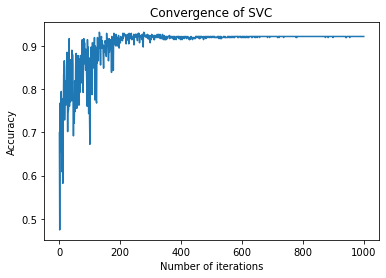

In [22]:

plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()
     